# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reading the Images

In [2]:
myDataDir = "cell_images/"

In [7]:
os.listdir(myDataDir)

['test', 'train']

In [8]:
trainPath = myDataDir + "train/"
testPath = myDataDir + "test/"

In [9]:
os.listdir(testPath)

['parasitized', 'uninfected']

In [10]:
os.listdir(trainPath)

['parasitized', 'uninfected']

In [11]:
paraCell = trainPath + "parasitized/C33P1thinF_IMG_20150619_121503a_cell_159.png" 

In [12]:
paraArray = imread(paraCell)
paraArray

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

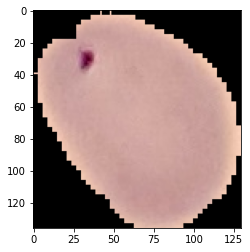

In [13]:
plt.imshow(paraArray)

In [14]:
paraArray.shape

(136, 130, 3)

In [15]:
uninfectedCell = trainPath + "uninfected/C1_thinF_IMG_20150604_104942_cell_4.png"

In [16]:
uninfectedArr = imread(uninfectedCell)
uninfectedArr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

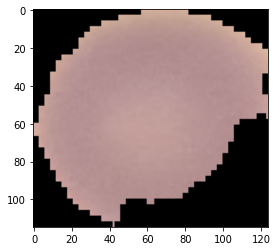

In [17]:
plt.imshow(uninfectedArr)

In [18]:
uninfectedArr.shape

(115, 124, 3)

# Checking Image Dimensions

In [19]:
dim1 = []
dim2 = []

In [20]:
for image in os.listdir(trainPath + "uninfected/"):
    img = imread(trainPath + "uninfected/" + image)
    (d1, d2, colours) = img.shape
    dim1.append(d1)
    dim2.append(d2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


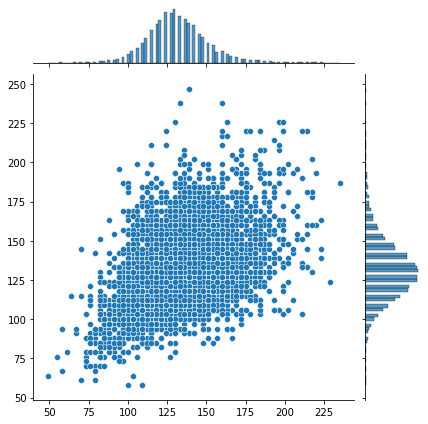

In [21]:
import seaborn as sns

sns.jointplot(dim1, dim2)

# Saving Resized Images

In [25]:
newDir = "resized_images/"
os.listdir(newDir)

['test', 'train']

In [26]:
newTrainPath = newDir + "train/"
newTestPath = newDir + "test/"

In [34]:
for folder in os.listdir(trainPath):
    for file in os.listdir(trainPath + folder):
        image = Image.open(trainPath + folder + "/" + file)
        resizedImage = image.resize((128, 128))
        resizedImage.save(newTrainPath + folder + "/" + file)

In [35]:
for folder in os.listdir(testPath):
    for file in os.listdir(testPath + folder):
        image = Image.open(testPath + folder + "/" + file)
        resizedImage = image.resize((128, 128))
        resizedImage.save(newTestPath + folder + "/" + file)

# Data Augmentation

In [22]:
img_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, 
                                  rescale=1/255, zoom_range=0.1, 
                                  horizontal_flip=True, 
                                  fill_mode="nearest")

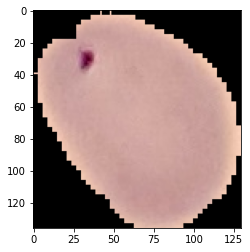

In [24]:
plt.imshow(paraArray)

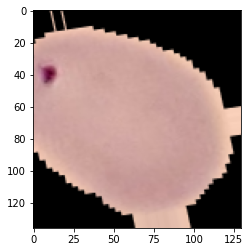

In [26]:
plt.imshow(img_generator.random_transform(paraArray))

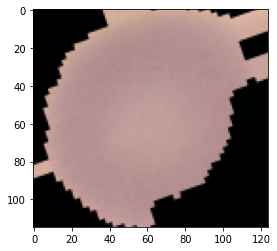

In [27]:
plt.imshow(img_generator.random_transform(uninfectedArr))

# Getting the Images

In [40]:
train_img = []
train_labels = []
test_img = []
test_labels = []

In [41]:
for folder in os.listdir(newTrainPath):
    for image in os.listdir(newTrainPath + folder):
        imageArr = imread(newTrainPath + folder + "/" +image)
        train_img.append(imageArr)
        train_labels.append(folder)

In [42]:
for folder in os.listdir(newTestPath):
    for image in os.listdir(newTestPath + folder):
        imageArr = imread(newTestPath + folder + "/" +image)
        test_img.append(imageArr)
        test_labels.append(folder)